In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data load

In [3]:
import pandas as pd

emnist = pd.read_csv("data/emnist-digits-train.csv", index_col=0)
emnist.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
8,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(emnist.shape)

(239999, 784)


In [5]:
train_digit = emnist.index
print('digit:', np.unique(train_digit))

digit: [0 1 2 3 4 5 6 7 8 9]


In [6]:
train_digit.shape

(239999,)

In [7]:
train_digit

Int64Index([9, 6, 3, 6, 6, 7, 1, 9, 0, 9,
            ...
            3, 4, 7, 5, 7, 4, 2, 1, 1, 0],
           dtype='int64', name='8', length=239999)

In [8]:
data = emnist
target = train_digit

In [9]:
data = emnist.iloc[:]

In [10]:
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
8,,,,,,,,,,,,,,,,,,,,,
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X, y = data, target

Saving figure some_digit_plot


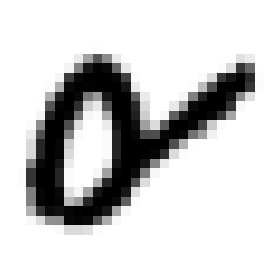

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = emnist.iloc[0]
some_digit_image = some_digit.values.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [13]:
y[0]

9

## Train Model

In [14]:
from sklearn.ensemble import ExtraTreesClassifier

model2 = ExtraTreesClassifier()

In [16]:
model2.fit(X,y)

ExtraTreesClassifier()

In [17]:
from sklearn.model_selection import cross_val_score

scores2 = cross_val_score(model2, X, y,
                        scoring="accuracy", cv=10)

In [18]:
scores2

array([0.983125  , 0.98266667, 0.98308333, 0.98270833, 0.982375  ,
       0.98391667, 0.98416667, 0.98341667, 0.982     , 0.98341598])

In [19]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores2)

Scores: [0.983125   0.98266667 0.98308333 0.98270833 0.982375   0.98391667
 0.98416667 0.98341667 0.982      0.98341598]
Mean: 0.9830874308998985
Standard deviation: 0.0006388246341402663
